In [1]:
import os
import functools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

import pynhm.pynhm as pynhm
import pynhm.prms5util as prms5util

# Load PRMS5 Input and Output Files for NHM Basin

In [2]:
input_data_path = "../prms_models/box01/input"
output_data_path = "../prms_models/box01/output"

In [3]:
input_data_path
datanames = ["precipitation", "temp_min", "temp_max"]
filenames = ["prcp.cbh", "tmin.cbh", "tmax.cbh"]
input_df = prms5util.load_prms_input(input_data_path, datanames, filenames)
input_df

Loading ../prms_models/box01/input/prcp.cbh
Loading ../prms_models/box01/input/tmin.cbh
Loading ../prms_models/box01/input/tmax.cbh


,date,precipitation,temp_min,temp_max
0,1979-01-01,0.00,31.0,43.6
1,1979-01-02,0.04,31.0,47.2
2,1979-01-03,0.02,34.1,53.0
3,1979-01-04,0.49,38.2,53.7
4,1979-01-05,0.48,34.9,42.9
...,...,...,...,...
14977,2019-12-27,0.00,34.2,50.6
14978,2019-12-28,0.00,29.1,48.3
14979,2019-12-29,0.76,29.6,41.8
14980,2019-12-30,0.82,34.6,39.6


In [4]:
# load prms output
csvfiles = [f for f in os.listdir(output_data_path) if f.endswith(".csv")]
csvfiles.remove("stats.csv")
output_df = prms5util.load_prms_output(output_data_path, csvfiles)
output_df

,date,soil_moist_tot,hru_impervstor,net_snow,net_ppt,hru_sroffp,hru_snow,tmaxf,hortonian_flow,tminf,intcp_stor,canopy_covden,net_rain,intcp_evap,hru_ppt,hru_sroffi,hru_rain,hru_impervevap
0,1980-10-01,0.0000,0.0,0.0,0.0000,0.0000,0.0,78.5987,0.0000,49.7339,0.0000,0.2308,0.0000,0.0000,0.0000,0.0,0.0000,0.0
1,1980-10-02,0.0926,0.0,0.0,0.1030,0.0000,0.0,77.5987,0.0000,51.5339,0.0038,0.2308,0.1030,0.0000,0.1039,0.0,0.1039,0.0
2,1980-10-03,0.3290,0.0,0.0,0.2629,0.0001,0.0,66.2987,0.0001,51.1339,0.0038,0.2308,0.2629,0.0000,0.2629,0.0,0.2629,0.0
3,1980-10-04,0.3684,0.0,0.0,0.0672,0.0000,0.0,66.2987,0.0000,45.0339,0.0038,0.2308,0.0672,0.0000,0.0672,0.0,0.0672,0.0
4,1980-10-05,0.3468,0.0,0.0,0.0000,0.0000,0.0,63.0987,0.0000,42.9339,0.0000,0.2308,0.0000,0.0038,0.0000,0.0,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14331,2019-12-27,2.0748,0.0,0.0,0.0000,0.0000,0.0,49.9269,0.0000,34.6239,0.0000,0.2308,0.0000,0.0000,0.0000,0.0,0.0000,0.0
14332,2019-12-28,2.0376,0.0,0.0,0.0000,0.0000,0.0,47.6269,0.0000,29.5239,0.0000,0.2308,0.0000,0.0000,0.0000,0.0,0.0000,0.0
14333,2019-12-29,2.4328,0.0,0.0,0.7713,0.2080,0.0,41.1269,0.2080,30.0239,0.0038,0.2308,0.7713,0.0000,0.7722,0.0,0.7722,0.0
14334,2019-12-30,2.5656,0.0,0.0,0.8332,0.3527,0.0,38.9269,0.3527,35.0239,0.0038,0.2308,0.8332,0.0000,0.8332,0.0,0.8332,0.0


In [5]:
# load the prms5 stats.csv file
fname = os.path.join(output_data_path, "stats.csv")
prms_stats_df = prms5util.load_prms_statscsv(fname)
prms_stats_df.columns

Index(['date', 'basin_potet', 'basin_actet', 'basin_dprst_evap',
       'basin_imperv_evap', 'basin_intcp_evap', 'basin_lakeevap',
       'basin_perv_et', 'basin_snowevap', 'basin_swrad', 'basin_ppt',
       'basin_pk_precip', 'basin_tmax', 'basin_tmin', 'basin_snowcov',
       'basin_total_storage', 'basin_surface_storage', 'basin_dprst_volcl',
       'basin_dprst_volop', 'basin_gwstor', 'basin_imperv_stor',
       'basin_intcp_stor', 'basin_lake_stor', 'basin_pweqv',
       'basin_soil_moist', 'basin_ssstor', 'basin_pref_stor', 'basin_slstor',
       'basin_soil_rechr', 'basin_capwaterin', 'basin_dprst_seep',
       'basin_gwin', 'basin_pref_flow_in', 'basin_recharge', 'basin_snowmelt',
       'basin_soil_to_gw', 'basin_sz2gw', 'basin_gwsink', 'basin_prefflow',
       'basin_slowflow', 'basin_hortonian', 'basin_dunnian', 'basin_stflow_in',
       'basin_stflow_out', 'basin_gwflow', 'basin_dnflow',
       'basin_gwstor_minarea_wb', 'basin_cfs', 'basin_gwflow_cfs',
       'basin_sroff_

In [6]:
prms_stats_df.loc[:, ["date", "basin_intcp_stor", "basin_intcp_evap"]]

,date,basin_intcp_stor,basin_intcp_evap
0,1980-10-01,0.0000,0.0000
1,1980-10-02,0.0009,0.0000
2,1980-10-03,0.0009,0.0000
3,1980-10-04,0.0009,0.0000
4,1980-10-05,0.0000,0.0009
...,...,...,...
14331,2019-12-27,0.0000,0.0000
14332,2019-12-28,0.0000,0.0000
14333,2019-12-29,0.0009,0.0000
14334,2019-12-30,0.0009,0.0000


# Run Python NHM

In [7]:
start_time = datetime.datetime(1980, 10, 1)
end_time = datetime.datetime(2019, 12, 31)
#end_time = datetime.datetime(1980, 10, 15)
delta_time = datetime.timedelta(days=1)
print(start_time, end_time)

1980-10-01 00:00:00 2019-12-31 00:00:00


In [8]:
# for now assume rainfall is the precipitation input
#date_mask = (input_df["date"] >= start_time) & (input_df["date"] <= end_time)
#rainfall = input_df.loc[date_mask, ["precipitation"]]
#rainfall = np.array(rainfall).flatten()
#rainfall

# assume that rainfall is the hru_ppt data in the NHM output
date_mask = (output_df["date"] >= start_time) & (output_df["date"] <= end_time)
rainfall = output_df.loc[date_mask, ["hru_ppt"]]
rainfall = np.array(rainfall).flatten()
rainfall

array([0.    , 0.1039, 0.2629, ..., 0.7722, 0.8332, 0.1118])

In [9]:
# for now provide potential ET as basin_potet prms output
date_mask = (prms_stats_df["date"] >= start_time) & (prms_stats_df["date"] <= end_time)
potential_evapotranspiration = prms_stats_df.loc[date_mask, ["basin_potet"]]
potential_evapotranspiration = np.array(potential_evapotranspiration).flatten()
potential_evapotranspiration

array([0.1863, 0.184 , 0.1359, ..., 0.0131, 0.0122, 0.0155])

In [10]:
# run a pynhm run
from pynhm import pynhm

print("Initializing...")
#rainfall = [4.5, 0., 0., 0., 0.]
#potential_evapotranspiration = len(rainfall) * [1.]

# conversion factors
inch_to_meter = 0.0254
acre_to_meter_squared = 4046.8564224

# Assign input variables and convert to metric units
area = 1.0 * acre_to_meter_squared

# forcings
rainfall *= inch_to_meter
potential_evapotranspiration *= inch_to_meter

# interception
intcp_stor_max = 0.003847 * inch_to_meter
covden = 0.2308

# surface runoff
hru_percent_imperv = 0.0
imperv_stor_start = 0.0 * inch_to_meter
imperv_stor_max = 0.0500000 * inch_to_meter
carea_min = 0.2 # default
carea_max = 0.4233057
soil_rechr_max_frac = 0.8170124
smidx_coef = 0.0145790
smidx_exp = 0.4046090  # 1 / inch
smidx_exp = smidx_exp / inch_to_meter

forcings = pynhm.AtmosphericForcings(
    rainfall, 
    potential_evapotranspiration
)

cnp = pynhm.Canopy(
    id=0, 
    area=area, 
    forcing=forcings,
    verbose=False,
    intcp_stor_start=0., 
    intcp_stor_max=intcp_stor_max, 
    covden=covden
)

sro = pynhm.SurfaceRunoff(
    id=1, 
    area=area, 
    forcing=forcings,
    verbose=False,
    hru_percent_imperv=hru_percent_imperv, 
    imperv_stor_start=imperv_stor_start,
    imperv_stor_max=imperv_stor_max,
    carea_min=carea_min,
    carea_max=carea_max,
    soil_rechr_max_frac=soil_rechr_max_frac,
    smidx_coef=smidx_coef,
    smidx_exp=smidx_exp,
)

# connect storage units
cnp.register_recipient(sro, "net_precipitation")

# create list of storage units in order of flow calculation
storage_units = [cnp, sro]

time_length = float(delta_time.days)
verbose = False
current_time = start_time
itime_step = 0
while current_time <= end_time:

    if verbose:
        print(f"processing {current_time} ...")

    forcings.advance(itime_step, current_time)

    for storage_unit in storage_units:
        storage_unit.advance()

    for storage_unit in storage_units:
        storage_unit.calculate(time_length)

    if verbose:
        for storage_unit in storage_units:
            print(storage_unit.get_budget_summary_str())
        
    current_time += delta_time
    itime_step += 1
    
print("Finalizing...")
for storage_unit in storage_units:
    storage_unit.finalize()

Initializing...
Finalizing...


# Process Canopy Budget

In [11]:
# output for python version
cnp_df = pd.DataFrame(np.array(cnp.output_data), columns=cnp.output_column_names)
cnp_df

,date,precip,aet,intcp_ds,net_precip,residual,intcp_stor_new,intcp_stor_old
0,1980-10-01,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
1,1980-10-02,10.679897,-0.0,-0.091266,-10.588631,0.0,0.000098,0.0
2,1980-10-03,27.023531,-0.091266,-0.0,-26.932265,0.0,0.000098,0.000098
3,1980-10-04,6.907498,-0.091266,-0.0,-6.816232,0.0,0.000098,0.000098
4,1980-10-05,0.0,-0.091266,0.091266,-0.0,0.0,0.0,0.000098
...,...,...,...,...,...,...,...,...
14331,2019-12-27,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
14332,2019-12-28,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
14333,2019-12-29,79.374556,-0.0,-0.091266,-79.28329,-0.0,0.000098,0.0
14334,2019-12-30,85.644756,-0.091266,-0.0,-85.553489,-0.0,0.000098,0.000098


In [12]:
# calculate english equivalents for comparison with prms
conversion = [
    ("precip", 1. / area / inch_to_meter),
    ("aet", 1. / area / inch_to_meter),
    ("intcp_ds", 1. / area / inch_to_meter),
    ("net_precip", 1. / area / inch_to_meter),
    ("residual", 1. / area / inch_to_meter),
    ("intcp_stor_new", 1. / inch_to_meter),
    ("intcp_stor_old", 1. / inch_to_meter),
]
cnp_english_df = cnp_df.copy()
for name, conversion_factor in conversion:
    cnp_english_df[name] *= conversion_factor
cnp_english_df

,date,precip,aet,intcp_ds,net_precip,residual,intcp_stor_new,intcp_stor_old
0,1980-10-01,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
1,1980-10-02,0.1039,-0.0,-0.000888,-0.103012,0.0,0.003847,0.0
2,1980-10-03,0.2629,-0.000888,-0.0,-0.262012,0.0,0.003847,0.003847
3,1980-10-04,0.0672,-0.000888,-0.0,-0.066312,0.0,0.003847,0.003847
4,1980-10-05,0.0,-0.000888,0.000888,-0.0,0.0,0.0,0.003847
...,...,...,...,...,...,...,...,...
14331,2019-12-27,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
14332,2019-12-28,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
14333,2019-12-29,0.7722,-0.0,-0.000888,-0.771312,-0.0,0.003847,0.0
14334,2019-12-30,0.8332,-0.000888,-0.0,-0.832312,-0.0,0.003847,0.003847


In [13]:
# PRMS output
output_df.loc[:, ["date", "hru_ppt", "net_ppt", "intcp_stor", "intcp_evap"]]

,date,hru_ppt,net_ppt,intcp_stor,intcp_evap
0,1980-10-01,0.0000,0.0000,0.0000,0.0000
1,1980-10-02,0.1039,0.1030,0.0038,0.0000
2,1980-10-03,0.2629,0.2629,0.0038,0.0000
3,1980-10-04,0.0672,0.0672,0.0038,0.0000
4,1980-10-05,0.0000,0.0000,0.0000,0.0038
...,...,...,...,...,...
14331,2019-12-27,0.0000,0.0000,0.0000,0.0000
14332,2019-12-28,0.0000,0.0000,0.0000,0.0000
14333,2019-12-29,0.7722,0.7713,0.0038,0.0000
14334,2019-12-30,0.8332,0.8332,0.0038,0.0000


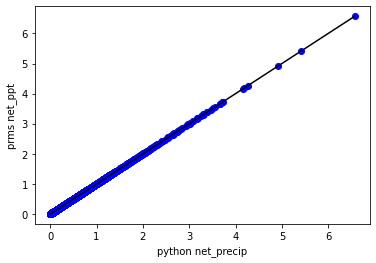

In [14]:
d1 = np.array(-cnp_english_df["net_precip"])
d2 = np.array(output_df["net_ppt"])
ax = plt.subplot(1, 1, 1)
ax.plot(d1, d2, 'bo')
ax.set_xlabel("python net_precip")
ax.set_ylabel("prms net_ppt")
dmax = max(d1.max(), d2.max())
ax.plot([0, dmax], [0, dmax], 'k-')

# Process Surface Runoff

In [15]:
# output for python version
sro_df = pd.DataFrame(np.array(sro.output_data), columns=sro.output_column_names)
sro_df

,date,net_precipitation,impervious_runoff,impervious_ds,impervious_et,pervious_runoff,infiltration,residual,impervious_stor_new,impervious_stor_old
0,1980-10-01,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
1,1980-10-02,10.588631,-0.0,-0.0,-0.0,-4.482228,-6.106403,0.0,0.00127,0.0
2,1980-10-03,26.932265,-0.0,-0.0,-0.0,-11.400581,-15.531684,0.0,0.00127,0.00127
3,1980-10-04,6.816232,-0.0,-0.0,-0.0,-2.88535,-3.930882,0.0,0.00127,0.00127
4,1980-10-05,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.00127
...,...,...,...,...,...,...,...,...,...,...
14331,2019-12-27,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
14332,2019-12-28,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
14333,2019-12-29,79.28329,-0.0,-0.0,-0.0,-33.561069,-45.722222,0.0,0.00127,0.0
14334,2019-12-30,85.553489,-0.0,-0.0,-0.0,-36.21528,-49.33821,0.0,0.00127,0.00127


In [16]:
# convert to english units for prms comparison
conversion = [
    ("net_precipitation", 1. / area / inch_to_meter),
    ("impervious_runoff", 1. / area / inch_to_meter),
    ("impervious_ds", 1. / area / inch_to_meter),
    ("impervious_et", 1. / area / inch_to_meter),
    ("pervious_runoff", 1. / area / inch_to_meter),
    ("infiltration", 1. / area / inch_to_meter),
    ("residual", 1. / area / inch_to_meter),
    ("impervious_stor_new", 1. / inch_to_meter),
    ("impervious_stor_old", 1. / inch_to_meter),
]
sro_english_df = sro_df.copy()
for name, conversion_factor in conversion:
    sro_english_df[name] *= conversion_factor
sro_english_df

,date,net_precipitation,impervious_runoff,impervious_ds,impervious_et,pervious_runoff,infiltration,residual,impervious_stor_new,impervious_stor_old
0,1980-10-01,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
1,1980-10-02,0.103012,-0.0,-0.0,-0.0,-0.043606,-0.059406,0.0,0.05,0.0
2,1980-10-03,0.262012,-0.0,-0.0,-0.0,-0.110911,-0.151101,0.0,0.05,0.05
3,1980-10-04,0.066312,-0.0,-0.0,-0.0,-0.02807,-0.038242,0.0,0.05,0.05
4,1980-10-05,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.05
...,...,...,...,...,...,...,...,...,...,...
14331,2019-12-27,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
14332,2019-12-28,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
14333,2019-12-29,0.771312,-0.0,-0.0,-0.0,-0.326501,-0.444811,0.0,0.05,0.0
14334,2019-12-30,0.832312,-0.0,-0.0,-0.0,-0.352322,-0.47999,0.0,0.05,0.05


In [17]:
# PRMS output
output_df.loc[:, ["date", "net_ppt", "hru_sroffi", "hru_impervevap", "hru_impervstor", 
                  "hru_sroffp"]]

,date,net_ppt,hru_sroffi,hru_impervevap,hru_impervstor,hru_sroffp
0,1980-10-01,0.0000,0.0,0.0,0.0,0.0000
1,1980-10-02,0.1030,0.0,0.0,0.0,0.0000
2,1980-10-03,0.2629,0.0,0.0,0.0,0.0001
3,1980-10-04,0.0672,0.0,0.0,0.0,0.0000
4,1980-10-05,0.0000,0.0,0.0,0.0,0.0000
...,...,...,...,...,...,...
14331,2019-12-27,0.0000,0.0,0.0,0.0,0.0000
14332,2019-12-28,0.0000,0.0,0.0,0.0,0.0000
14333,2019-12-29,0.7713,0.0,0.0,0.0,0.2080
14334,2019-12-30,0.8332,0.0,0.0,0.0,0.3527


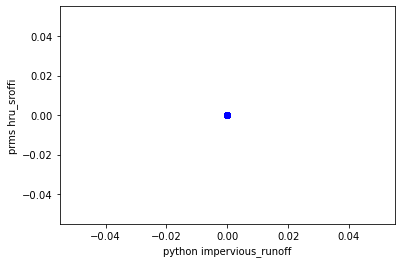

In [18]:
d1 = np.array(-sro_english_df["impervious_runoff"])
d2 = np.array(output_df["hru_sroffi"])
ax = plt.subplot(1, 1, 1)
ax.plot(d1, d2, 'bo')
ax.set_xlabel("python impervious_runoff")
ax.set_ylabel("prms hru_sroffi")
dmax = max(d1.max(), d2.max())
ax.plot([0, dmax], [0, dmax], 'k-')

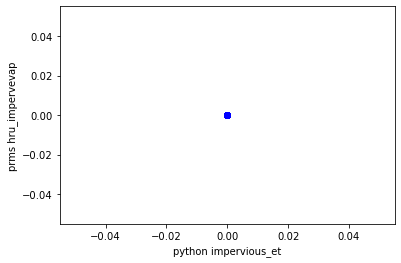

In [19]:
d1 = np.array(-sro_english_df["impervious_et"])
d2 = np.array(output_df["hru_impervevap"])
ax = plt.subplot(1, 1, 1)
ax.plot(d1, d2, 'bo')
ax.set_xlabel("python impervious_et")
ax.set_ylabel("prms hru_impervevap")
dmax = max(d1.max(), d2.max())
ax.plot([0, dmax], [0, dmax], 'k-')

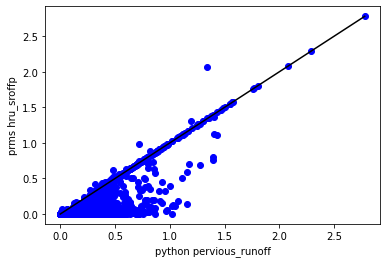

In [20]:
d1 = np.array(-sro_english_df["pervious_runoff"])
d2 = np.array(output_df["hru_sroffp"])
ax = plt.subplot(1, 1, 1)
ax.plot(d1, d2, 'bo')
ax.set_xlabel("python pervious_runoff")
ax.set_ylabel("prms hru_sroffp")
dmax = max(d1.max(), d2.max())
ax.plot([0, dmax], [0, dmax], 'k-')